In [1]:
# Import necessary library
import pandas as pd

# Load the updated dataset
data = pd.read_csv(r'C:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\Data\cleaned_data_with_region_and_price_per_m2.csv')

# Check the first few rows to understand the structure and types of data
data_info = data.info()
data_head = data.head()

data_info, data_head



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8356 entries, 0 to 8355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8356 non-null   int64  
 1   Property ID         8356 non-null   int64  
 2   Locality data       8356 non-null   int64  
 3   Price               8356 non-null   int64  
 4   Property type       8356 non-null   object 
 5   Number of bedrooms  8356 non-null   float64
 6   Living area m²      8356 non-null   float64
 7   Equipped kitchen    8356 non-null   int64  
 8   Furnished           8356 non-null   int64  
 9   Open fire           8356 non-null   int64  
 10  Terrace surface m²  4087 non-null   float64
 11  Garden area m²      2388 non-null   float64
 12  Swimming pool       8356 non-null   int64  
 13  Building condition  8356 non-null   object 
 14  Price per m²        8356 non-null   float64
 15  Region              8356 non-null   object 
 16  Provin

(None,
    Unnamed: 0  Property ID  Locality data   Price Property type  \
 0        9333     20135745           8300  999999     apartment   
 1        1737     20206578           4140  999999         house   
 2        7967     20135600           8300  999999     apartment   
 3        2563     20234889           1851  999000         house   
 4        5435     20215434           1160  997000     apartment   
 
    Number of bedrooms  Living area m²  Equipped kitchen  Furnished  Open fire  \
 0                 2.0           118.0                 0          0          1   
 1                13.0           778.0                 1          0          1   
 2                 2.0           118.0                 0          0          1   
 3                 4.0           345.0                 1          1          1   
 4                 3.0           144.0                 0          0          1   
 
    Terrace surface m²  Garden area m²  Swimming pool Building condition  \
 0           

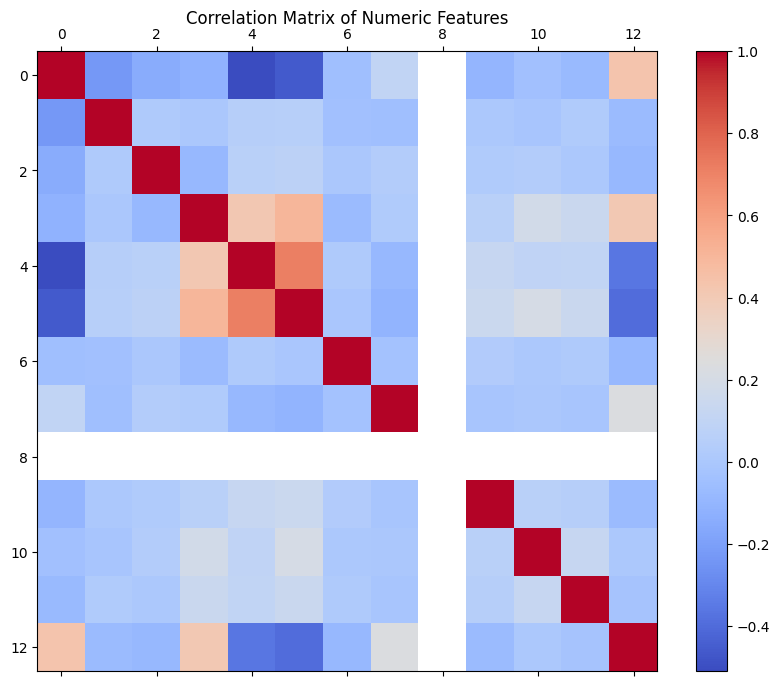

[]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.title("Correlation Matrix of Numeric Features", pad=20)
plt.show()

# Find pairs with high correlation above a threshold of 0.8
threshold = 0.8
high_corr_pairs = [(i, j, correlation_matrix[i][j]) 
                   for i in correlation_matrix.columns 
                   for j in correlation_matrix.columns 
                   if (i != j) and (abs(correlation_matrix[i][j]) > threshold)]

high_corr_pairs

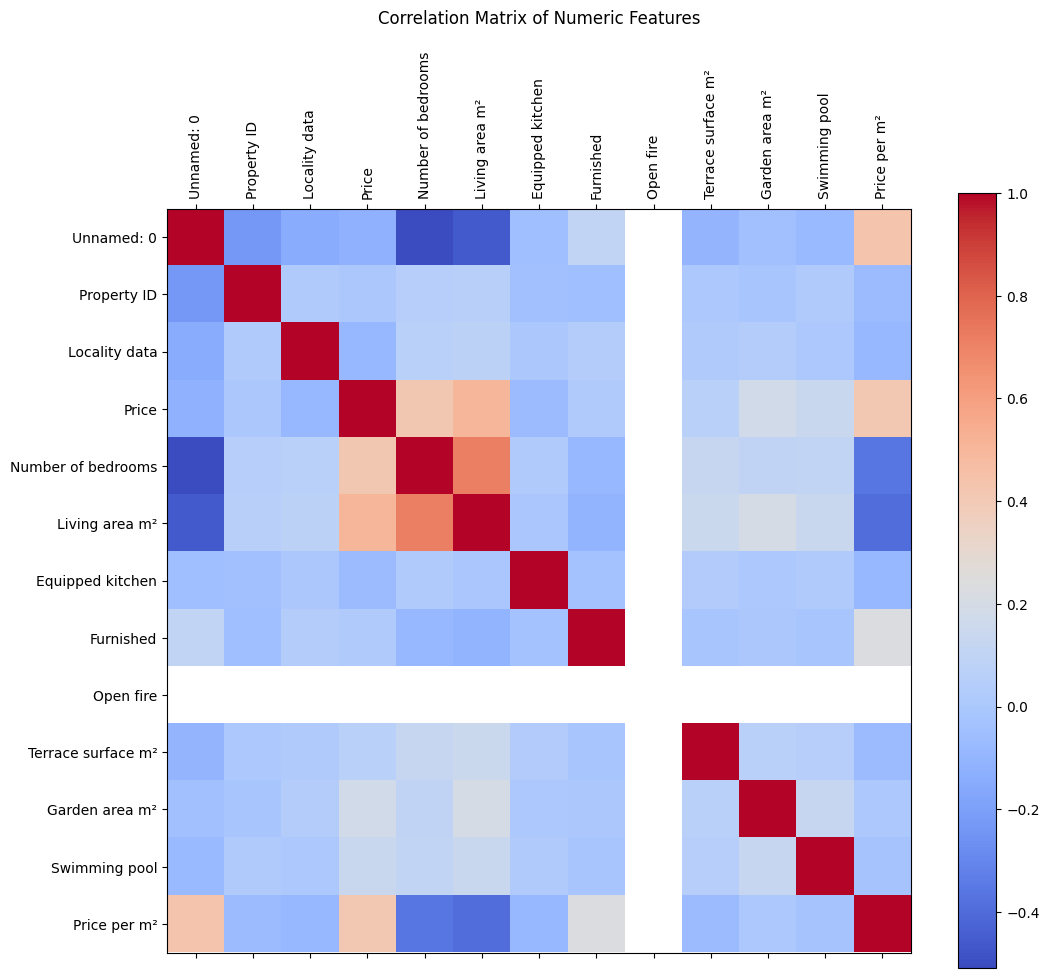

In [3]:
# Plot the correlation matrix with axis labels for better readability
plt.figure(figsize=(12, 10))
plt.matshow(correlation_matrix, cmap="coolwarm", fignum=1)
plt.colorbar()

# Add axis labels for each variable
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns)

plt.title("Correlation Matrix of Numeric Features", pad=20)
plt.show()

In [4]:
# Re-import necessary libraries and reload the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reload the dataset
file_path = r'C:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\Data\cleaned_data_with_region_and_price_per_m2.csv'
data = pd.read_csv(file_path)

# Drop the specified columns
columns_to_drop = [
    'Unnamed: 0', 
    'Property ID', 
    'Locality data', 
    'Open fire', 
    'Terrace surface m²', 
    'Garden area m²', 
    'Price per m²', 
    'Region'
]
data_reduced = data.drop(columns=columns_to_drop)

# Display the first few rows of the modified dataset to confirm changes
data_reduced.head()

,Price,Property type,Number of bedrooms,Living area m²,Equipped kitchen,Furnished,Swimming pool,Building condition,Province
0,999999,apartment,2.0,118.0,0,0,0,As new,West Flanders
1,999999,house,13.0,778.0,1,0,0,Good,Liège
2,999999,apartment,2.0,118.0,0,0,0,As new,West Flanders
3,999000,house,4.0,345.0,1,1,0,Good,Flemish Brabant
4,997000,apartment,3.0,144.0,0,0,0,As new,Brussels


Update corelation matrix

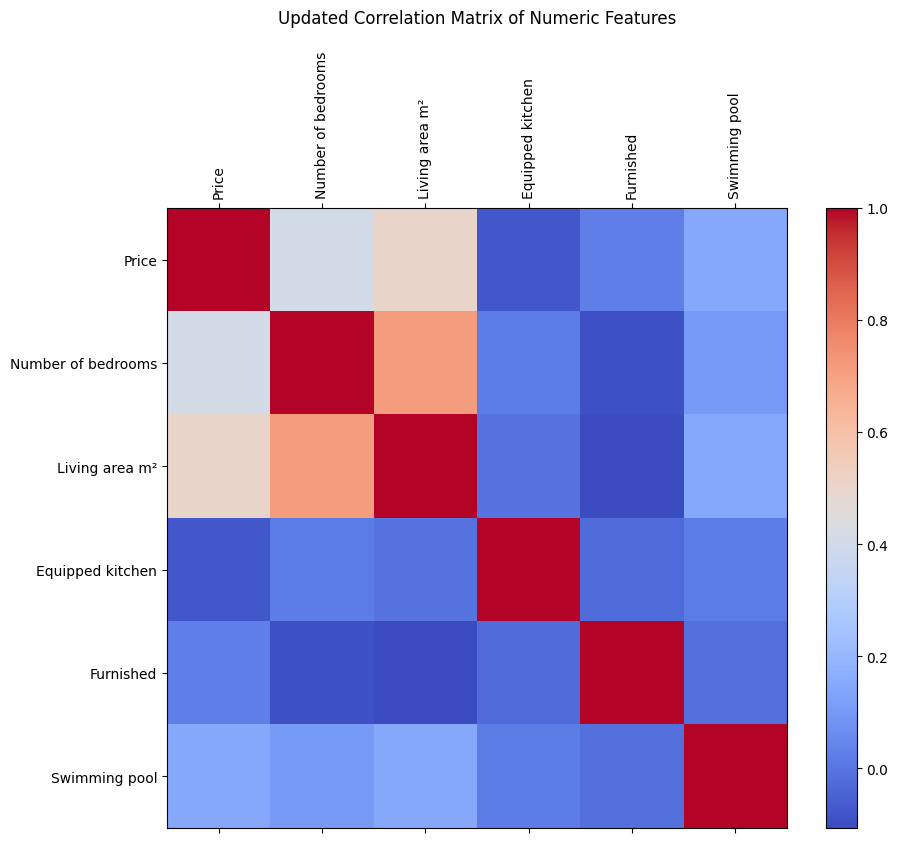

In [5]:
# Calculate the correlation matrix for the reduced dataset (only numeric columns)
numeric_data_reduced = data_reduced.select_dtypes(include=[np.number])
correlation_matrix_reduced = numeric_data_reduced.corr()

# Plot the updated correlation matrix with axis labels
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix_reduced, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.xticks(ticks=np.arange(len(correlation_matrix_reduced.columns)), 
           labels=correlation_matrix_reduced.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation_matrix_reduced.columns)), 
           labels=correlation_matrix_reduced.columns)
plt.title("Updated Correlation Matrix of Numeric Features", pad=20)
plt.show()


Кодування категоріальних змінних Building condition перетворюємо за допомогою Label encoding, а Property type і Province — за допомогою One-hot encoding.

In [6]:

import sklearn
from sklearn.preprocessing import LabelEncoder

# Apply Label encoding to the "Building condition" column
label_encoder = LabelEncoder()
data_reduced['Building condition'] = label_encoder.fit_transform(data_reduced['Building condition'])

# Apply One-hot encoding to the other categorical columns: "Property type" and "Province"
data_encoded = pd.get_dummies(data_reduced, columns=['Property type', 'Province'], drop_first=True)

# Display the first few rows of the encoded dataset to confirm the changes
data_encoded.head()


,Price,Number of bedrooms,Living area m²,Equipped kitchen,Furnished,Swimming pool,Building condition,Property type_house,Province_Brussels,Province_East Flanders,Province_Flemish Brabant,Province_Hainaut,Province_Limburg,Province_Liège,Province_Luxembourg,Province_Namur,Province_Walloon Brabant,Province_West Flanders
0,999999,2.0,118.0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True
1,999999,13.0,778.0,1,0,0,1,True,False,False,False,False,False,True,False,False,False,False
2,999999,2.0,118.0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True
3,999000,4.0,345.0,1,1,0,1,True,False,False,True,False,False,False,False,False,False,False
4,997000,3.0,144.0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False


In [7]:
# List of columns to convert
columns_to_convert = ['Building condition'] + [col for col in data_encoded.columns if 'Property type' in col or 'Province' in col]

# Conversion of True/False values ​​to 1/0 only in specified columns
data_encoded[columns_to_convert] = data_encoded[columns_to_convert].astype(int)

# Check the result
print(data_encoded[columns_to_convert].head())
print(data_encoded.dtypes)
data_encoded.head()

   Building condition  Property type_house  Province_Brussels  \
0                   0                    0                  0   
1                   1                    1                  0   
2                   0                    0                  0   
3                   1                    1                  0   
4                   0                    0                  1   

   Province_East Flanders  Province_Flemish Brabant  Province_Hainaut  \
0                       0                         0                 0   
1                       0                         0                 0   
2                       0                         0                 0   
3                       0                         1                 0   
4                       0                         0                 0   

   Province_Limburg  Province_Liège  Province_Luxembourg  Province_Namur  \
0                 0               0                    0               0   
1                 

,Price,Number of bedrooms,Living area m²,Equipped kitchen,Furnished,Swimming pool,Building condition,Property type_house,Province_Brussels,Province_East Flanders,Province_Flemish Brabant,Province_Hainaut,Province_Limburg,Province_Liège,Province_Luxembourg,Province_Namur,Province_Walloon Brabant,Province_West Flanders
0,999999,2.0,118.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,999999,13.0,778.0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2,999999,2.0,118.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,999000,4.0,345.0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0
4,997000,3.0,144.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [8]:
# List of columns to check
columns_to_check = ['Building condition'] + [col for col in data_encoded.columns if 'Property type' in col or 'Province' in col]

# Check the data type in the specified columns
print(data_encoded[columns_to_check].dtypes)

Building condition          int64
Property type_house         int64
Province_Brussels           int64
Province_East Flanders      int64
Province_Flemish Brabant    int64
Province_Hainaut            int64
Province_Limburg            int64
Province_Liège              int64
Province_Luxembourg         int64
Province_Namur              int64
Province_Walloon Brabant    int64
Province_West Flanders      int64
dtype: object


In [9]:
from sklearn.preprocessing import StandardScaler

# Define numeric columns to scale (except 'Price')
numeric_columns = data_encoded.select_dtypes(include=[np.number]).columns.drop('Price')

# Initialize the standard scaler
scaler = StandardScaler()

# Scaling numeric columns and updating values ​​in the dataset
data_encoded[numeric_columns] = scaler.fit_transform(data_encoded[numeric_columns])

# Check the results
print(data_encoded.head())


    Price  Number of bedrooms  Living area m²  Equipped kitchen  Furnished  \
0  999999           -0.637991       -0.337976         -0.801635  -0.200199   
1  999999            8.192238        6.971681          1.247451  -0.200199   
2  999999           -0.637991       -0.337976         -0.801635  -0.200199   
3  999000            0.967506        2.176103          1.247451   4.995029   
4  997000            0.164757       -0.050020         -0.801635  -0.200199   

   Swimming pool  Building condition  Property type_house  Province_Brussels  \
0       -0.13428           -1.093721            -1.015194          -0.489843   
1       -0.13428           -0.315591             0.985033          -0.489843   
2       -0.13428           -1.093721            -1.015194          -0.489843   
3       -0.13428           -0.315591             0.985033          -0.489843   
4       -0.13428           -1.093721            -1.015194           2.041469   

   Province_East Flanders  Province_Flemish Braban

In [10]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_encoded.drop('Price', axis=1)  # All columns except the target
y = data_encoded['Price']  # Target column

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (6684, 17) (6684,)
Test set shape: (1672, 17) (1672,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model using MAE, MSE, RMSE, and R^2 score
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

# Display the results with rounding
print("Linear Regression Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_linear, 2))
print("Mean Squared Error (MSE):", np.round(mse_linear, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_linear, 2))
print("R^2 Score:", np.round(r2_linear, 2))

Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 103686.02
Mean Squared Error (MSE): 22000077534.31
Root Mean Squared Error (RMSE): 148324.23
R^2 Score: 0.42


c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train) # Training the model on the training data

# Prediction on the test set
y_pred = model.predict(X_test)

# Calculation of metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Display the results
print("Random forest regressor performance metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Square Error (MSE):", mse)
print("The root mean square error (RMSE):", rmse)
print("R^2 Score:", r2)


Random forest regressor performance metrics:
Mean Absolute Error (MAE): 92063.23121344489
Mean Square Error (MSE): 17627138426.17109
The root mean square error (RMSE): 132767.2340081358
R^2 Score: 0.5316610782128293


c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 103,686.02 — середня абсолютна помилка означає, що модель в середньому помиляється на 103 тисячі євро при прогнозуванні ціни нерухомості. Це досить велика помилка для передбачення ціни, що свідчить про те, що модель не може точно передбачити вартість нерухомості.

Mean Squared Error (MSE): 22,000,077,534.31 — середньоквадратична помилка підсилює великі відхилення. Високе значення MSE означає, що є значні відмінності між передбаченими і фактичними цінами.

Root Mean Squared Error (RMSE): 148,324.23 — коренева середньоквадратична помилка має ту ж одиницю вимірювання, що і ціна, і показує велику середню відхиленість, вказуючи на значні помилки при передбаченні.

R² Score: 0.42 — цей показник означає, що модель пояснює лише 42% варіативності цін на нерухомість. Це низький показник, який вказує, що модель не може добре передбачити змінність даних.

Які мають бути показники?
Ідеально, хороша модель для регресії має такі характеристики:

MAE та RMSE мають бути якнайменшими. Це означає, що модель робить менші помилки.
R² має бути близьким до 1, що свідчить про те, що модель добре пояснює варіативність цільової змінної.

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model using MAE, MSE, RMSE, and R^2 score
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)


# Display the results with rounding
print("Random Forest Regressor Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_rf, 2))
print("Mean Squared Error (MSE):", np.round(mse_rf, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_rf, 2))
print("R^2 Score:", np.round(r2_rf, 2))


Random Forest Regressor Performance Metrics:
Mean Absolute Error (MAE): 92063.23
Mean Squared Error (MSE): 17627138426.17
Root Mean Squared Error (RMSE): 132767.23
R^2 Score: 0.53


c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model using MAE, MSE, RMSE, and R^2 score
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mean_squared_error(y_test, y_pred_tree, squared=False)
r2_tree = r2_score(y_test, y_pred_tree)

# Display the results with rounding
print("Decision Tree Regressor Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_tree, 2))
print("Mean Squared Error (MSE):", np.round(mse_tree, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_tree, 2))
print("R^2 Score:", np.round(r2_tree, 2))


Decision Tree Regressor Performance Metrics:
Mean Absolute Error (MAE): 111137.09
Mean Squared Error (MSE): 27119610884.78
Root Mean Squared Error (RMSE): 164680.33
R^2 Score: 0.28


c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=tree_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # Optimize for RMSE
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV model
grid_search.fit(X_train, y_train)

# Extract the best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE Score:", best_score)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best RMSE Score: 130888.79909696884
Decision Tree Regressor Performance Metrics:
Mean Absolute Error (MAE): 111137.09
Mean Squared Error (MSE): 27119610884.78
Root Mean Squared Error (RMSE): 164680.33
R^2 Score: 0.28


результати для Decision Tree Regressor після налаштування гіперпараметрів показують значне покращення:

Best RMSE Score: 130,888.80 — це краще, ніж попередні результати, отримані з іншими моделями (лінійна регресія, випадковий ліс). Зменшення RMSE свідчить про те, що модель стала точнішою.

Best Parameters:

max_depth: 10 — обмеження глибини дерева запобігло переобученню, зосередивши модель на важливих ознаках.
max_features: None — модель використовує всі ознаки на кожному вузлі, що, ймовірно, допомогло досягти кращої продуктивності.
min_samples_leaf: 5 і min_samples_split: 20 — більші значення для цих параметрів зменшують ймовірність переобучення, дозволяючи моделі зосередитися на більш значущих поділах.

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor with the best parameters
final_tree_model = DecisionTreeRegressor(
    max_depth=10,
    max_features=None,
    min_samples_leaf=5,
    min_samples_split=20,
    random_state=42
)

# Train the model on the entire training dataset
final_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_final = final_tree_model.predict(X_test)

# Evaluate the model on the test set
mae_final = mean_absolute_error(y_test, y_pred_final)
mse_final = mean_squared_error(y_test, y_pred_final)
rmse_final = mean_squared_error(y_test, y_pred_final, squared=False)
r2_final = r2_score(y_test, y_pred_final)

# Display the results with rounding for better readability
print("Final Decision Tree Regressor Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_final, 2))
print("Mean Squared Error (MSE):", np.round(mse_final, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_final, 2))
print("R^2 Score:", np.round(r2_final, 2))


Final Decision Tree Regressor Performance Metrics:
Mean Absolute Error (MAE): 92493.84
Mean Squared Error (MSE): 17276275215.56
Root Mean Squared Error (RMSE): 131439.25
R^2 Score: 0.54


c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# Initialize the Random Forest Regressor and Linear Regression models
random_forest_model = RandomForestRegressor(random_state=42)
linear_model = LinearRegression()

# Train the Random Forest model on the training data
random_forest_model.fit(X_train, y_train)

# Train the Linear Regression model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set with both models
y_pred_rf = random_forest_model.predict(X_test)
y_pred_lr = linear_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluate the Linear Regression model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = r2_score(y_test, y_pred_lr)

# Display the results with rounding for better readability
print("\nRandom Forest Regressor Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_rf, 2))
print("Mean Squared Error (MSE):", np.round(mse_rf, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_rf, 2))
print("R^2 Score:", np.round(r2_rf, 2))

print("\nLinear Regression Performance Metrics:")
print("Mean Absolute Error (MAE):", np.round(mae_lr, 2))
print("Mean Squared Error (MSE):", np.round(mse_lr, 2))
print("Root Mean Squared Error (RMSE):", np.round(rmse_lr, 2))
print("R^2 Score:", np.round(r2_lr, 2))



Random Forest Regressor Performance Metrics:
Mean Absolute Error (MAE): 92063.23
Mean Squared Error (MSE): 17627138426.17
Root Mean Squared Error (RMSE): 132767.23
R^2 Score: 0.53

Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 103686.02
Mean Squared Error (MSE): 22000077534.31
Root Mean Squared Error (RMSE): 148324.23
R^2 Score: 0.42


c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Anastasiia\Documents\GitHub\immo-eliza-ml\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
